   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

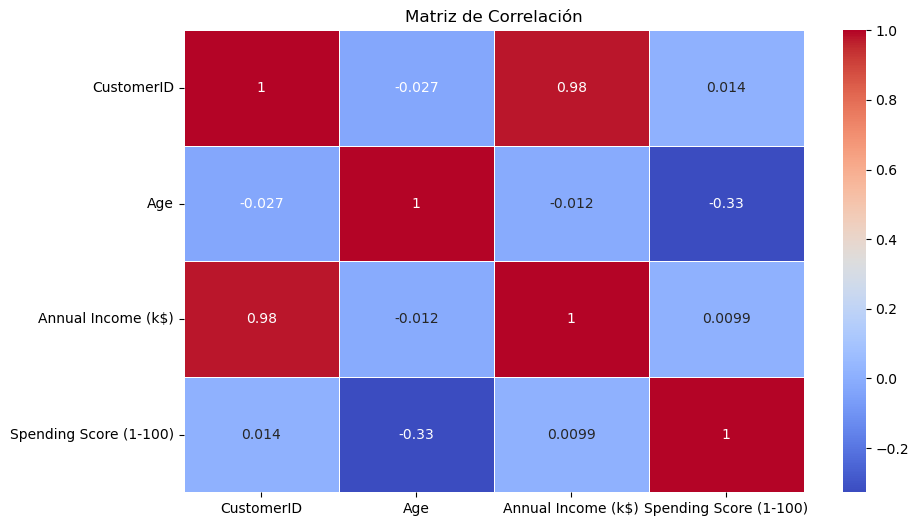

In [20]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
df = pd.read_csv("C:/Users/Javier Alexander Gar/Downloads/Mosquera tareas/ANÁLISIS DE DATOS/Tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv")

# Mostrar las primeras filas del dataset
print(df.head())

# Verificar los tipos de datos y la presencia de valores nulos
print(df.info())

# Verificar si hay valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Análisis de correlación (solo para columnas numéricas)
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Solo columnas numéricas

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [21]:
# Eliminar filas con valores nulos (si las hubiera)
df_clean = df.dropna()

# Codificar la columna 'Gender' de categórica a numérica (Male=0, Female=1)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar las características numéricas para el modelo
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalización de los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Definir el modelo de Clustering Jerárquico
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Ajustar el modelo y predecir los clusters
df_clean['Cluster'] = hc.fit_predict(X_scaled)

# Ver los primeros registros con sus asignaciones de clusters
print(df_clean.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        4  
1        0  
2        4  
3        0  
4        4  


In [17]:
# Coeficiente de Silhouette
silhouette = silhouette_score(X_scaled, df_clean['Cluster'])
print(f"Coeficiente de Silhouette: {silhouette}")

# Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_scaled, df_clean['Cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhouette: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374


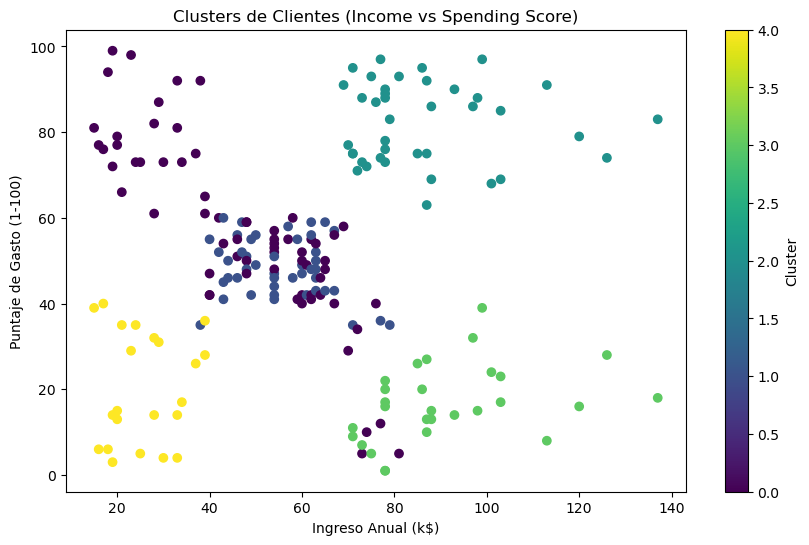

In [18]:
# Graficar los clusters en un gráfico 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Annual Income (k$)'], df_clean['Spending Score (1-100)'], c=df_clean['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes (Income vs Spending Score)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()

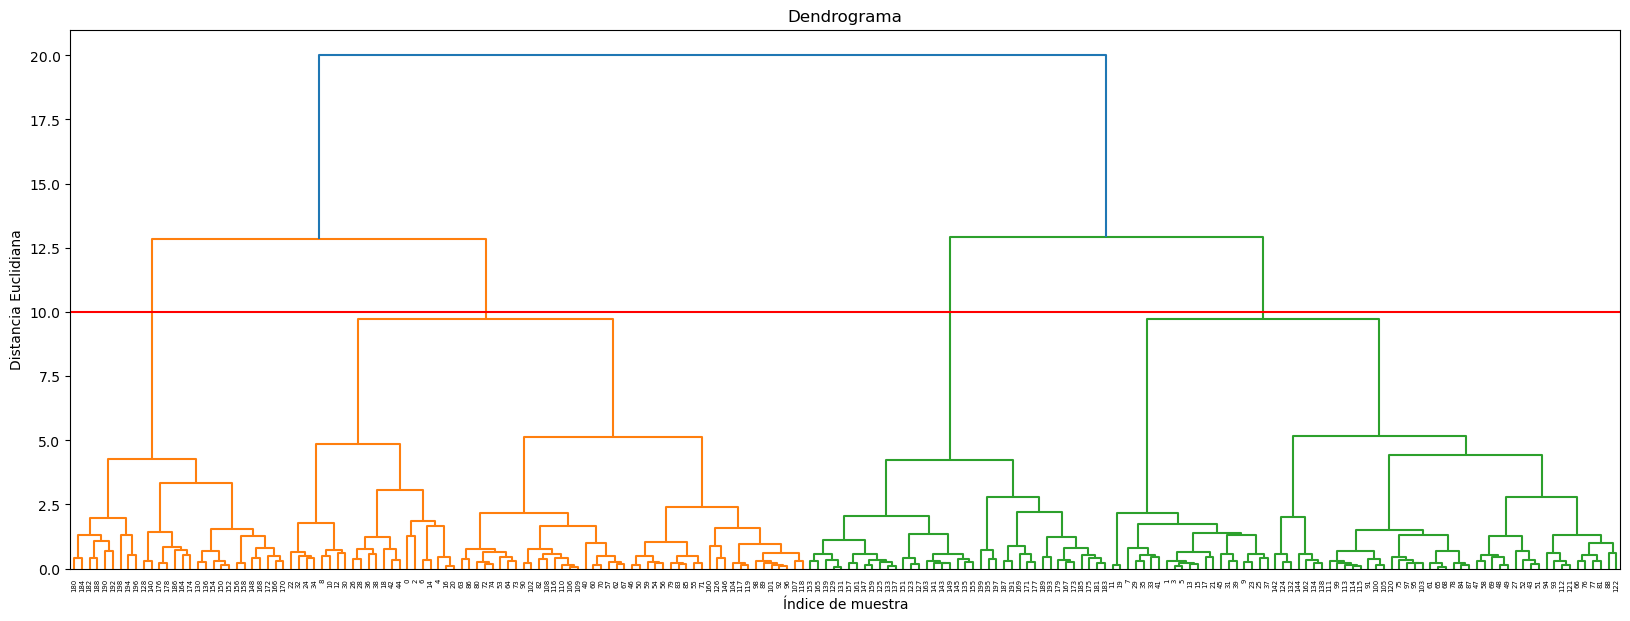

In [22]:
# Realizar el Clustering Jerárquico con el método Ward
ward_clustering = linkage(X_scaled, method="ward", metric="euclidean")

# Crear y mostrar el Dendrograma
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y=10, color='r', linestyle='-')  # Línea roja para cortar el dendrograma
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()